In [0]:
!pip install keras_sequential_ascii

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

from keras.models import Sequential
model = Sequential()
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
num_classes=10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [0]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))


model.add(MaxPool2D())

model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Tensorboard


# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip

# LOG_DIR = './log'
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 6007 &'
#     .format(LOG_DIR)
# )

# get_ipython().system_raw('./ngrok http 6007 &')

--2018-12-10 16:08:59--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.152.127.232, 52.4.75.11, 54.173.32.212, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.152.127.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]   5.11M  --.-KB/s    in 0.1s    

2018-12-10 16:08:59 (36.3 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
# !curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://c56b29f7.ngrok.io


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 383us/step - loss: 1.6262 - acc: 0.4182 - val_loss: 1.3951 - val_acc: 0.5064
Epoch 2/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.2909 - acc: 0.5485 - val_loss: 1.2169 - val_acc: 0.5759
Epoch 3/100
50000/50000 [==============================] - 13s 257us/step - loss: 1.1728 - acc: 0.5908 - val_loss: 1.1700 - val_acc: 0.5914
Epoch 4/100
50000/50000 [==============================] - 13s 254us/step - loss: 1.0878 - acc: 0.6230 - val_loss: 1.0786 - val_acc: 0.6261
Epoch 5/100
50000/50000 [==============================] - 13s 270us/step - loss: 1.0271 - acc: 0.6446 - val_loss: 1.0511 - val_acc: 0.6324
Epoch 6/100
50000/50000 [==============================] - 14s 270us/step - loss: 0.9860 - acc: 0.6587 - val_loss: 1.0242 - val_acc: 0.6531
Epoch 7/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.9436 - acc: 0.6748 - val_l

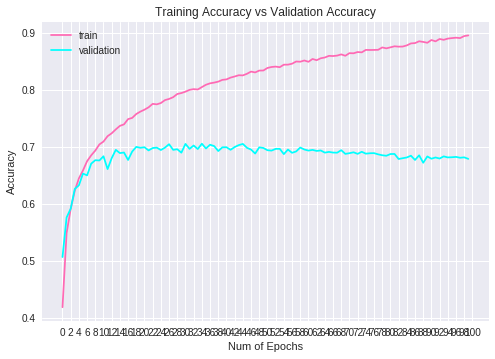

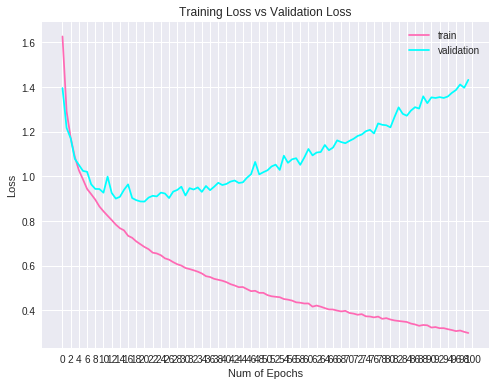

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[699  15  59  33  14   8  13  18 112  29]
 [ 34 757  11  10   8   9   5   8  70  88]
 [ 68   5 569  96  64  54  65  47  23   9]
 [ 22   7  85 552  58 124  64  50  26  12]
 [ 17   1  95  84 581  45  57 103  15   2]
 [  7   2  65 229  37 526  31  78  18   7]
 [  4   8  44 106  27  24 761  13  11   2]
 [ 20   1  42  56  51  43  11 761   7   8]
 [ 66  21  19  23   8   3   6   9 826  19]
 [ 39  81  13  13   7  13   8  20  49 757]]


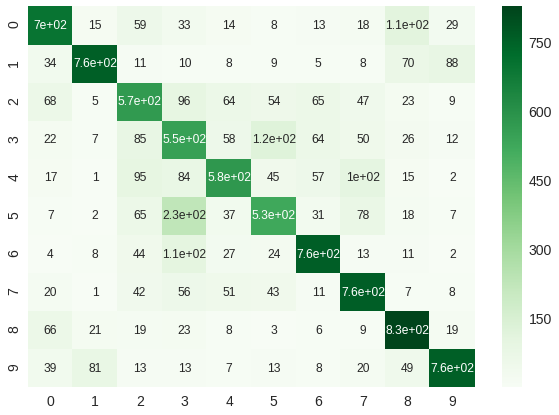

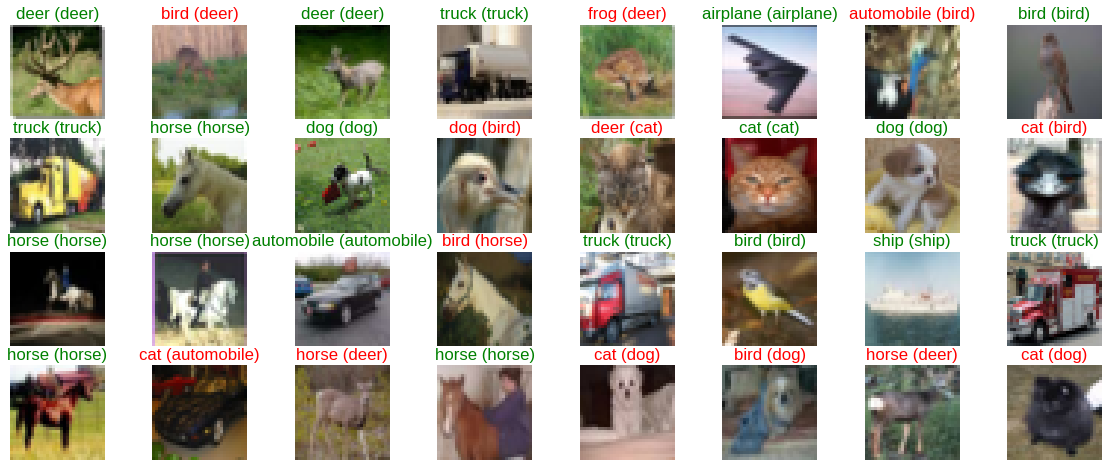

In [0]:
batch_size=128
epochs=100



# from keras.callbacks import TensorBoard
# tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
#                          write_graph=True,
#                          write_grads=True,
#                          batch_size=batch_size,
#                          write_images=True)




starttime = datetime.datetime.now()

model1 = model.fit(x_train, y_train, batch_size=batch_size, 
                   epochs=epochs, verbose=1, validation_data=(x_test, y_test))

endtime = datetime.datetime.now()
print (endtime - starttime)

plt.figure(0)
plt.plot(model1.history['acc'],'hotpink')
plt.plot(model1.history['val_acc'],'cyan')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(model1.history['loss'],'hotpink')
plt.plot(model1.history['val_loss'],'cyan')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

# Confusion matrix result
 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Greens",annot=True,annot_kws={"size": 12})# font size
plt.show()


# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))